In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("salaries.csv",parse_dates=["work_year"])

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M
4,2022-01-01,MI,FT,Security Operations Engineer,95000,GBP,121239,GB,0,GB,M
...,...,...,...,...,...,...,...,...,...,...,...
1305,2020-01-01,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1307,2021-01-01,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1308,2021-01-01,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [4]:
df.drop("salary_currency",axis=1)

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,154700,US,100,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,131495,US,100,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,95000,US,0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,70000,US,0,US,M
4,2022-01-01,MI,FT,Security Operations Engineer,95000,121239,GB,0,GB,M
...,...,...,...,...,...,...,...,...,...,...
1305,2020-01-01,MI,FT,Cyber Security Analyst,140000,96422,AU,50,AU,M
1306,2021-01-01,SE,FT,Information Security Manager,60000,82528,GB,50,GB,L
1307,2021-01-01,SE,FT,Penetration Testing Engineer,126000,126000,US,100,US,L
1308,2021-01-01,MI,FT,Information Security Analyst,42000,57769,GB,100,GB,L


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Histogram of Salaries Count')

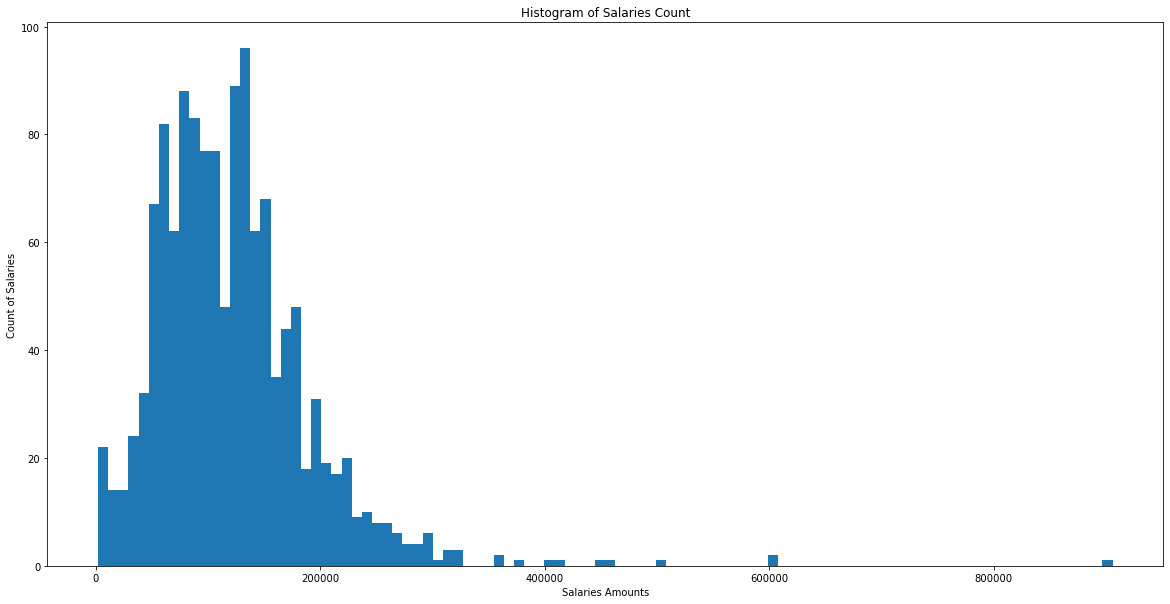

In [6]:
plt.figure(figsize=(20,10))
plt.hist(df["salary_in_usd"],bins=100);
plt.ylabel("Count of Salaries")
plt.xlabel("Salaries Amounts")
plt.title("Histogram of Salaries Count")

In [7]:
df["salary_in_usd"].mean()

121246.1572519084

In [8]:
df.salary_in_usd.std()

69427.67736282591

In [9]:
df["z_scores"]=(df.salary_in_usd-df.salary_in_usd.mean())/df.salary_in_usd.std()

In [10]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.481852
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.147619
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.378036
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-0.738123
4,2022-01-01,MI,FT,Security Operations Engineer,95000,GBP,121239,GB,0,GB,M,-0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2020-01-01,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M,-0.357554
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.557676
1307,2021-01-01,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,0.068472
1308,2021-01-01,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L,-0.914292


In [11]:
df1=df[(df.z_scores>-3) & (df.z_scores<3)]
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.481852
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.147619
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.378036
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-0.738123
4,2022-01-01,MI,FT,Security Operations Engineer,95000,GBP,121239,GB,0,GB,M,-0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2020-01-01,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M,-0.357554
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.557676
1307,2021-01-01,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,0.068472
1308,2021-01-01,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L,-0.914292


Text(0.5, 1.0, 'Histogram of Salaries Count')

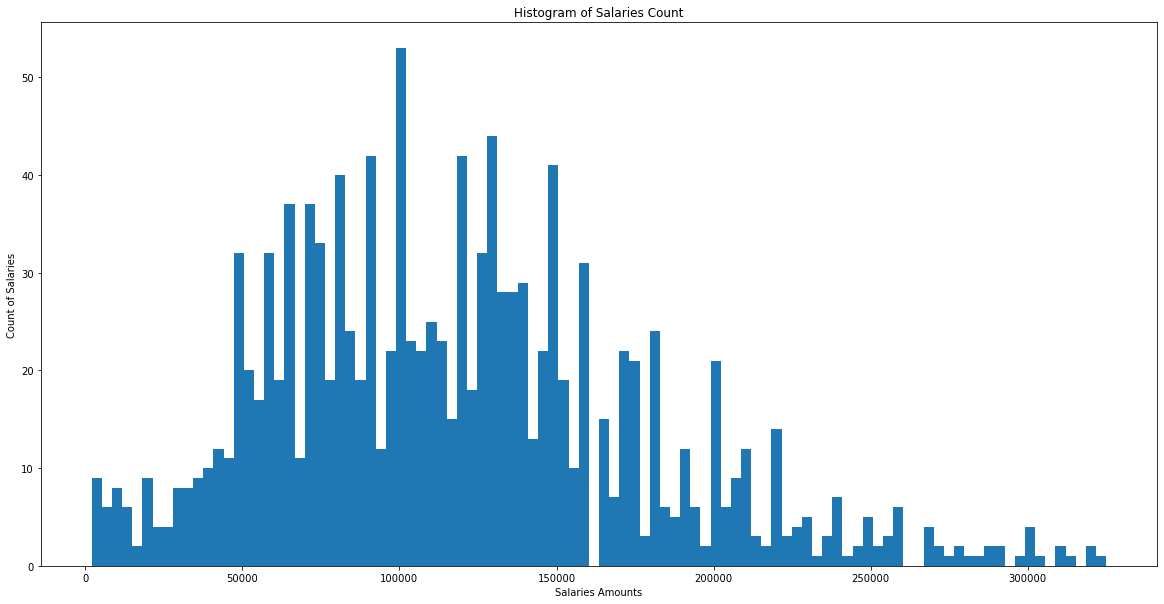

In [12]:
plt.figure(figsize=(20,10))
plt.hist(df1["salary_in_usd"],bins=100);
plt.ylabel("Count of Salaries")
plt.xlabel("Salaries Amounts")
plt.title("Histogram of Salaries Count")

In [13]:
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.481852
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.147619
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.378036
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-0.738123
4,2022-01-01,MI,FT,Security Operations Engineer,95000,GBP,121239,GB,0,GB,M,-0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2020-01-01,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M,-0.357554
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.557676
1307,2021-01-01,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,0.068472
1308,2021-01-01,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L,-0.914292


In [14]:
countries={}
for i,v in df.company_location.value_counts().items():
    countries[i]=v
countries

{'US': 929,
 'CA': 61,
 'GB': 61,
 'DE': 33,
 'IN': 23,
 'AU': 21,
 'FR': 19,
 'CH': 14,
 'NL': 13,
 'ES': 13,
 'BR': 12,
 'IT': 8,
 'PT': 8,
 'DK': 6,
 'PL': 5,
 'GR': 5,
 'NZ': 5,
 'IE': 5,
 'SG': 4,
 'RO': 4,
 'RU': 4,
 'SI': 4,
 'SE': 4,
 'BE': 3,
 'AR': 3,
 'ZA': 3,
 'NO': 3,
 'IL': 3,
 'EE': 2,
 'AT': 2,
 'AF': 2,
 'HU': 2,
 'JP': 2,
 'AE': 2,
 'DZ': 2,
 'PK': 1,
 'BW': 1,
 'SA': 1,
 'VN': 1,
 'TW': 1,
 'EG': 1,
 'LU': 1,
 'UM': 1,
 'CL': 1,
 'AZ': 1,
 'MX': 1,
 'RS': 1,
 'KE': 1,
 'AQ': 1,
 'ID': 1,
 'CZ': 1,
 'AX': 1,
 'HR': 1,
 'ET': 1,
 'TR': 1}

<BarContainer object of 55 artists>

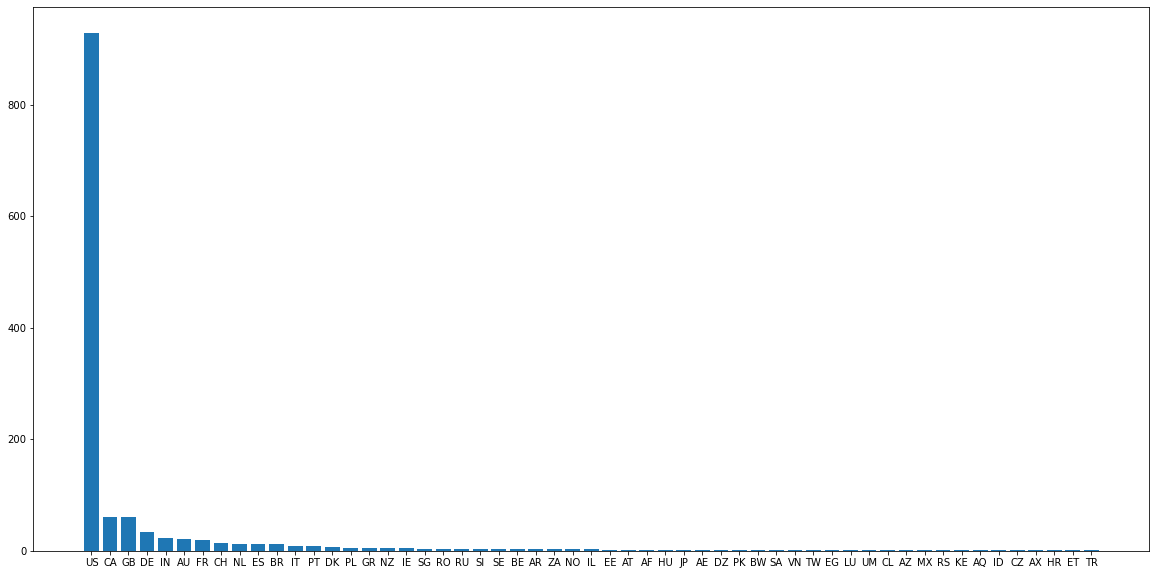

In [15]:
plt.figure(figsize=(20,10))
plt.bar(list(countries.keys()),list(countries.values()))

In [16]:
df2=df1[df1["company_location"]=="US"]
df2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.481852
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.147619
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.378036
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-0.738123
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.638451
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,2020-01-01,SE,FT,Information Security Specialist,170000,USD,170000,US,100,US,L,0.702225
1302,2021-01-01,SE,FT,Application Security Engineer,135000,USD,135000,US,100,US,L,0.198103
1303,2021-01-01,EN,FT,Cyber Security Analyst,100000,USD,100000,US,50,US,M,-0.306019
1307,2021-01-01,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L,0.068472


In [17]:
df3=df1[df1["company_location"]=="CA"]
df3

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
12,2022-01-01,SE,FT,Security Engineer,202400,USD,202400,CA,100,CA,M,1.168898
13,2022-01-01,SE,FT,Security Engineer,125800,USD,125800,CA,100,CA,M,0.065591
50,2022-01-01,SE,FT,Security Engineer,227200,USD,227200,CA,100,CA,M,1.526104
51,2022-01-01,SE,FT,Security Engineer,149600,USD,149600,CA,100,CA,M,0.408394
55,2022-01-01,SE,FT,Security Engineer,170200,USD,170200,CA,100,CA,M,0.705106
...,...,...,...,...,...,...,...,...,...,...,...,...
1111,2020-01-01,SE,FT,Cyber Security Specialist,104000,CAD,77572,CA,100,CA,L,-0.629060
1143,2021-01-01,EN,FT,SOC Analyst,76000,CAD,60619,CA,100,CA,M,-0.873242
1156,2021-01-01,SE,FT,Penetration Tester,113500,CAD,90530,CA,100,CA,M,-0.442419
1163,2021-01-01,SE,FT,Penetration Tester,126000,CAD,100500,CA,50,CA,L,-0.298817


In [18]:
df4=df1[df1["company_location"]=="GB"]
df4

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
4,2022-01-01,MI,FT,Security Operations Engineer,95000,GBP,121239,GB,0,GB,M,-0.000103
5,2022-01-01,MI,FT,Security Operations Engineer,50750,GBP,64767,GB,0,GB,M,-0.813496
10,2022-01-01,MI,FT,Security Engineer,96000,GBP,122515,GB,0,GB,M,0.018276
11,2022-01-01,MI,FT,Security Engineer,90000,GBP,114858,GB,0,GB,M,-0.092012
71,2021-01-01,MI,FT,Information Security Compliance Analyst,55000,GBP,75650,GB,50,GB,L,-0.656743
125,2022-01-01,MI,FT,DevSecOps Engineer,80000,GBP,102096,GB,100,GB,M,-0.275829
126,2022-01-01,MI,FT,DevSecOps Engineer,60000,GBP,76572,GB,100,GB,M,-0.643463
176,2022-01-01,MI,FT,Head of Information Security,107000,GBP,136554,GB,100,GB,M,0.220486
177,2022-01-01,MI,FT,Head of Information Security,92000,GBP,117411,GB,100,GB,M,-0.055240
185,2022-01-01,MI,FT,Security Operations Analyst,80000,GBP,102096,GB,100,GB,M,-0.275829


In [19]:
ans=pd.concat([df2,df3])
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.481852
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.147619
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.378036
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-0.738123
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.638451
...,...,...,...,...,...,...,...,...,...,...,...,...
1111,2020-01-01,SE,FT,Cyber Security Specialist,104000,CAD,77572,CA,100,CA,L,-0.629060
1143,2021-01-01,EN,FT,SOC Analyst,76000,CAD,60619,CA,100,CA,M,-0.873242
1156,2021-01-01,SE,FT,Penetration Tester,113500,CAD,90530,CA,100,CA,M,-0.442419
1163,2021-01-01,SE,FT,Penetration Tester,126000,CAD,100500,CA,50,CA,L,-0.298817


In [20]:
ans=pd.concat([ans,df4])
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.481852
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.147619
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.378036
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-0.738123
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.638451
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L,0.036669
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M,-0.176042
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L,-0.268411
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.557676


Text(0.5, 1.0, 'Histogram of Salaries Count')

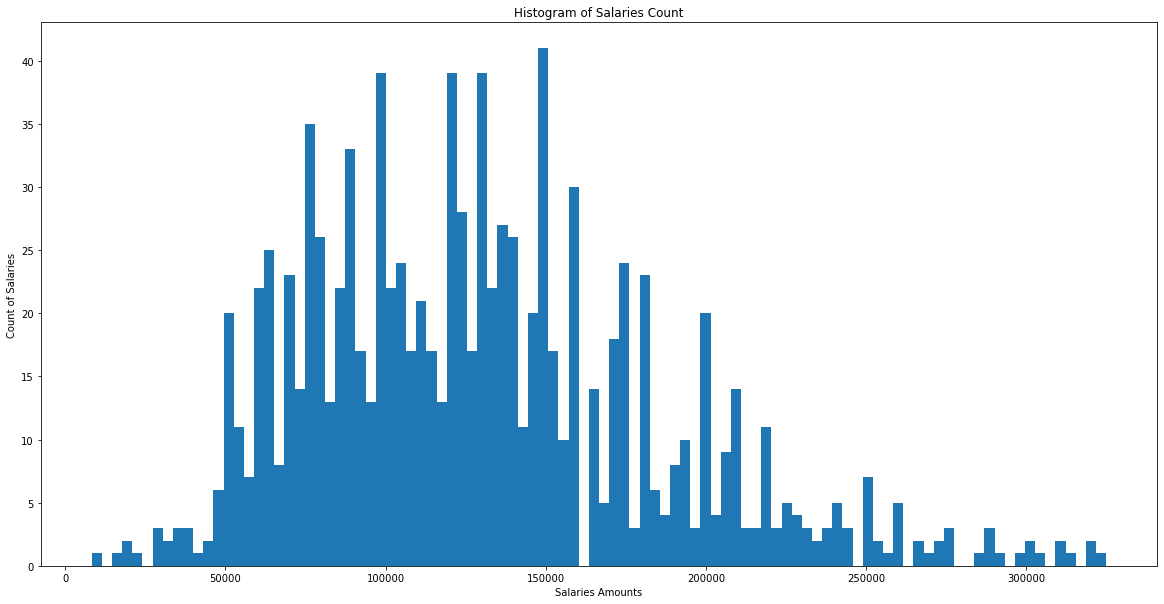

In [21]:
plt.figure(figsize=(20,10))
plt.hist(ans["salary_in_usd"],bins=100);
plt.ylabel("Count of Salaries")
plt.xlabel("Salaries Amounts")
plt.title("Histogram of Salaries Count")

In [22]:
mean=ans.salary_in_usd.mean()
mean

129801.75719769673

In [23]:
std=ans.salary_in_usd.std()
std

54998.20521928446

In [24]:
ans["z_scores"]=(ans.salary_in_usd-mean)/std

In [25]:
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.452710
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.030787
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.632780
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-1.087340
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.912758
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L,-0.109272
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M,-0.377790
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L,-0.494394
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.859551


In [26]:
ans[(ans.z_scores>-3) & (ans.z_scores<3)]
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.452710
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.030787
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.632780
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-1.087340
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.912758
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L,-0.109272
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M,-0.377790
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L,-0.494394
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.859551


Text(0.5, 1.0, 'Histogram of Salaries Count')

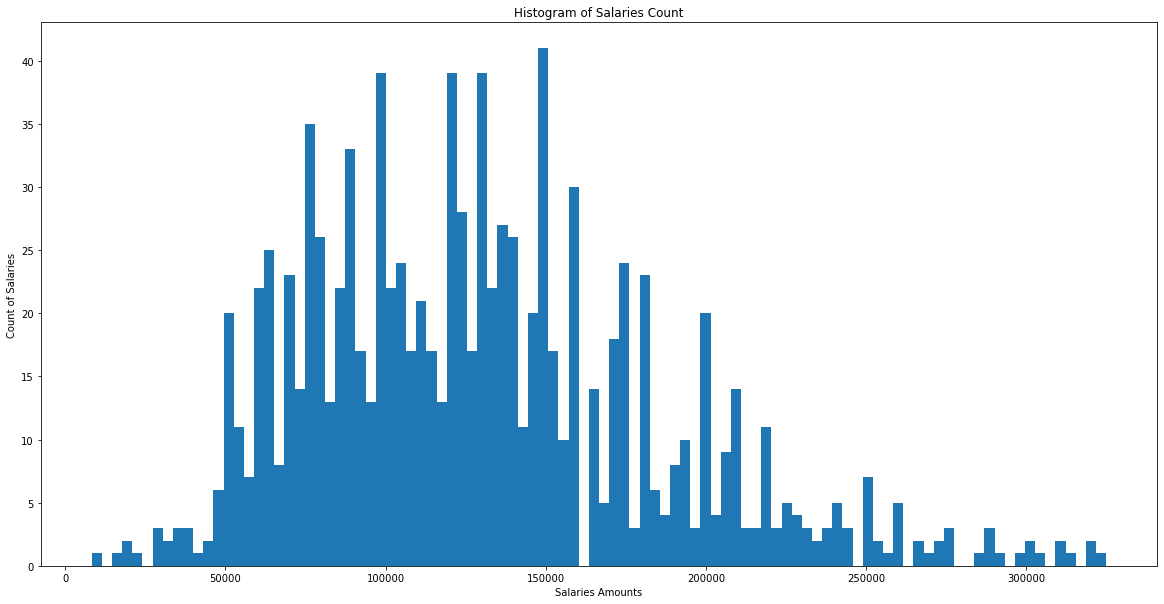

In [27]:
plt.figure(figsize=(20,10))
plt.hist(ans["salary_in_usd"],bins=100);
plt.ylabel("Count of Salaries")
plt.xlabel("Salaries Amounts")
plt.title("Histogram of Salaries Count")

In [28]:
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.452710
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.030787
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.632780
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-1.087340
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.912758
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L,-0.109272
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M,-0.377790
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L,-0.494394
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.859551


In [29]:
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_scores
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M,0.452710
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M,0.030787
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M,-0.632780
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M,-1.087340
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M,1.912758
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L,-0.109272
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M,-0.377790
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L,-0.494394
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L,-0.859551


In [30]:
ans=ans.drop("z_scores",axis=1)
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L


In [31]:
ans.employment_type.value_counts()

FT    1029
CT       7
PT       5
FL       1
Name: employment_type, dtype: int64

In [32]:
ans=ans[ans["employment_type"]=="FT"]

In [33]:
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,100,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,100,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0,US,M
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,50,GB,L
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,100,GB,M
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,50,GB,L
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L


In [34]:
ans.job_title.value_counts()

Security Engineer                          214
Cyber Security Analyst                      96
Cyber Security Engineer                     52
Information Security Manager                50
Security Analyst                            48
                                          ... 
Computer Forensic Software Engineer          1
Application Security Specialist              1
Enterprise Security Engineer                 1
Threat Intelligence Response Analyst         1
Information Security Compliance Analyst      1
Name: job_title, Length: 82, dtype: int64

In [35]:
ans.remote_ratio=ans.remote_ratio/100

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,1.0,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,1.0,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0.0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0.0,US,M
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,1.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,0.5,GB,L
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,1.0,GB,M
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,0.5,GB,L
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,0.5,GB,L


In [37]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           1029 non-null   datetime64[ns]
 1   experience_level    1029 non-null   object        
 2   employment_type     1029 non-null   object        
 3   job_title           1029 non-null   object        
 4   salary              1029 non-null   int64         
 5   salary_currency     1029 non-null   object        
 6   salary_in_usd       1029 non-null   int64         
 7   employee_residence  1029 non-null   object        
 8   remote_ratio        1029 non-null   float64       
 9   company_location    1029 non-null   object        
 10  company_size        1029 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 96.5+ KB


In [38]:
for i,v in ans.items():
    if pd.api.types.is_string_dtype(v):
        ans[i]=v.astype("category").cat.as_ordered()

C:\Users\harsh\AppData\Local\Temp/ipykernel_107060/2410622229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[i]=v.astype("category").cat.as_ordered()


In [39]:
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,1.0,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,1.0,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0.0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0.0,US,M
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,1.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,0.5,GB,L
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,1.0,GB,M
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,0.5,GB,L
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,0.5,GB,L


In [40]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           1029 non-null   datetime64[ns]
 1   experience_level    1029 non-null   category      
 2   employment_type     1029 non-null   category      
 3   job_title           1029 non-null   category      
 4   salary              1029 non-null   int64         
 5   salary_currency     1029 non-null   category      
 6   salary_in_usd       1029 non-null   int64         
 7   employee_residence  1029 non-null   category      
 8   remote_ratio        1029 non-null   float64       
 9   company_location    1029 non-null   category      
 10  company_size        1029 non-null   category      
dtypes: category(7), datetime64[ns](1), float64(1), int64(2)
memory usage: 51.5 KB


In [41]:
anscopy=ans
ans

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,154700,US,1.0,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,131495,US,1.0,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,95000,US,0.0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,70000,US,0.0,US,M
6,2022-01-01,SE,FT,Security Engineer,235000,USD,235000,US,1.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,123792,GB,0.5,GB,L
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,109024,GB,1.0,GB,M
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,102611,GB,0.5,GB,L
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,82528,GB,0.5,GB,L


In [42]:
x=ans.drop("salary_in_usd",axis=1)
y=ans["salary_in_usd"]

In [43]:
x

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022-01-01,SE,FT,Security Engineer,154700,USD,US,1.0,US,M
1,2022-01-01,SE,FT,Security Engineer,131495,USD,US,1.0,US,M
2,2022-01-01,MI,FT,Security Engineer,95000,USD,US,0.0,US,M
3,2022-01-01,MI,FT,Security Engineer,70000,USD,US,0.0,US,M
6,2022-01-01,SE,FT,Security Engineer,235000,USD,US,1.0,US,M
...,...,...,...,...,...,...,...,...,...,...
1245,2021-01-01,SE,FT,Security Engineer,90000,GBP,GB,0.5,GB,L
1265,2020-01-01,SE,FT,Information Security Architect,85000,GBP,GB,1.0,GB,M
1296,2020-01-01,SE,FT,Cyber Security Analyst,80000,GBP,GB,0.5,GB,L
1306,2021-01-01,SE,FT,Information Security Manager,60000,GBP,GB,0.5,GB,L


In [44]:
y

0       154700
1       131495
2        95000
3        70000
6       235000
         ...  
1245    123792
1265    109024
1296    102611
1306     82528
1308     57769
Name: salary_in_usd, Length: 1029, dtype: int64

In [45]:
for i,v in x.items():
    if not pd.api.types.is_numeric_dtype(v):
        x[i]=pd.Categorical(v).codes

In [46]:
x

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2,3,0,64,154700,6,20,1.0,2,1
1,2,3,0,64,131495,6,20,1.0,2,1
2,2,2,0,64,95000,6,20,0.0,2,1
3,2,2,0,64,70000,6,20,0.0,2,1
6,2,3,0,64,235000,6,20,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
1245,1,3,0,64,90000,4,9,0.5,1,0
1265,0,3,0,38,85000,4,9,1.0,1,1
1296,0,3,0,11,80000,4,9,0.5,1,0
1306,1,3,0,43,60000,4,9,0.5,1,0


In [47]:
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [48]:
d={
    "Ridge":Ridge(),
    "Linear regression":LinearRegression(),
    "Random Forest":RandomForestRegressor()
}

In [49]:
y

0       154700
1       131495
2        95000
3        70000
6       235000
         ...  
1245    123792
1265    109024
1296    102611
1306     82528
1308     57769
Name: salary_in_usd, Length: 1029, dtype: int64

In [51]:
max(y)

325000

In [52]:
y=y/325000

In [53]:
y

0       0.476000
1       0.404600
2       0.292308
3       0.215385
6       0.723077
          ...   
1245    0.380898
1265    0.335458
1296    0.315726
1306    0.253932
1308    0.177751
Name: salary_in_usd, Length: 1029, dtype: float64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [57]:
train_scores={}
test_scores={}
for i,v in d.items():
    model=v
    model.fit(x_train,y_train)
    test_scores[i]=model.score(x_test,y_test)
    train_scores[i]=model.score(x_train,y_train)
train_scores,test_scores

({'Ridge': 0.9605881723920582,
  'Linear regression': 0.9605882863921509,
  'Random Forest': 0.9957068145376751},
 {'Ridge': -13.87651893217296,
  'Linear regression': -13.876526595035939,
  'Random Forest': 0.9137734199755081})

In [56]:
scores={}

In [72]:
grid={"n_estimators":[10,20,50,100],
      "max_depth":[2,3,4,5],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,3,4,5],
     "min_samples_leaf":[2,3,4,5,6]}

In [73]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [74]:
model=RandomForestRegressor()
rscv=RandomizedSearchCV(estimator=model,n_iter=10,param_distributions=grid,cv=5,verbose=2)
rscv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 50, 100]},
                   verbose=2)

In [79]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 5}

In [80]:
rscv.score(x_test,y_test)

0.8980647746488363

In [82]:
gscv=GridSearchCV(estimator=model,param_grid=grid,cv=5,verbose=2)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=2)

In [83]:
gscv.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 20}

In [84]:
gscv.score(x_test,y_test)

0.9010742110288087

In [85]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
model.score(x_test,y_test)

0.9086985452297281

In [87]:
import pickle

In [89]:
with open("preds","wb") as f:
    pickle.dump(model,f)

In [92]:
answer=pickle.load(open("preds","rb"))

In [93]:
answer.score(x_test,y_test)

0.9086985452297281

In [97]:
y_preds=answer.predict(x_test)
y_preds

array([0.38455077, 0.30150092, 0.0916916 , 0.44023692, 0.48404788,
       0.33490043, 0.23072923, 0.52866154, 0.15808505, 0.53846154,
       0.53212308, 0.46892308, 0.68853846, 0.23917708, 0.49255385,
       0.32627542, 0.69854431, 0.84375138, 0.15615148, 0.38323692,
       0.25484378, 0.26535818, 0.39993846, 0.96082677, 0.39993846,
       0.19512031, 0.50818449, 0.10256154, 0.51849218, 0.64624615,
       0.18461563, 0.23072923, 0.15378769, 0.40502585, 0.44044615,
       0.4629328 , 0.21267855, 0.27131025, 0.55390769, 0.307684  ,
       0.31315745, 0.16015274, 0.61548615, 0.66223982, 0.72649231,
       0.41538462, 0.35544031, 0.38436923, 0.18326154, 0.54206585,
       0.38731692, 0.4       , 0.40430985, 0.39978462, 0.29840308,
       0.2704    , 0.25530683, 0.41538462, 0.32628   , 0.43078154,
       0.27689231, 0.36380031, 0.19521538, 0.31591538, 0.31542   ,
       0.46153846, 0.13272215, 0.30549569, 0.61576308, 0.38840812,
       0.41538462, 0.46892308, 0.56014062, 0.22338462, 0.4    

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score,r2_score

In [106]:
def metrics(y_test,y_preds):
    d={}
    d["MSE= "]=mean_squared_error(y_test,y_preds)
    d["MAE= "]=mean_absolute_error(y_test,y_preds)
    d["R2s= "]=r2_score(y_test,y_preds)
    return d

In [107]:
metrics(y_test,y_preds)

{'MSE= ': 0.0023999294401278147,
 'MAE= ': 0.007756627931292105,
 'R2s= ': 0.9086985452297281}

In [105]:
r2_score(y_test,y_preds)

0.9086985452297281